#### Regression Report

/home/kcosta/anaconda3/envs/holisticai/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


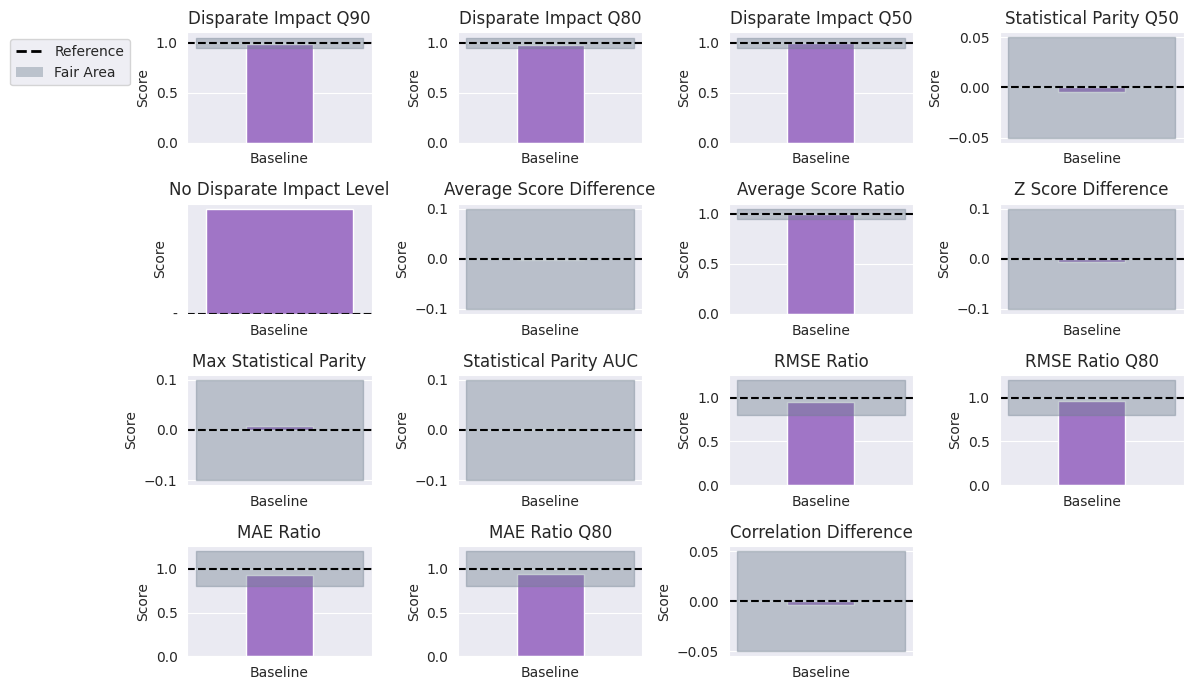

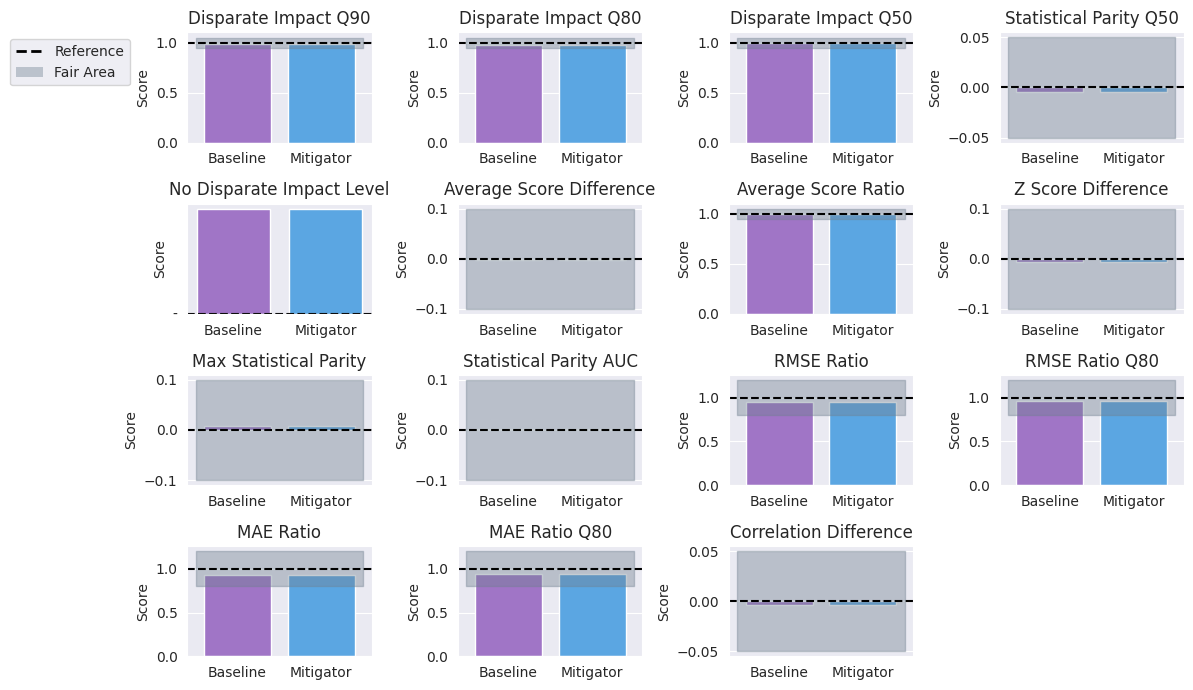

In [1]:
# Base Imports
import pandas as pd
import numpy as np
import sys
sys.path.append('../../../')

# Report Plots
from holisticai.bias.plots import bias_metrics_report

from holisticai.datasets import load_adult

df = load_adult()['frame']
group_a = df['sex']=='Female'
group_b = df['sex']=='Male'

from holisticai.bias.metrics import regression_bias_metrics
y_true = df['age']
y_pred = np.random.random(y_true.shape) # synthetic predictions
metrics = regression_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')
metrics_mitigated = regression_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')

bias_metrics_report('regression', metrics)
bias_metrics_report('regression', metrics, metrics_mitigated)

#### Classification Report

In [2]:
from holisticai.bias.metrics import classification_bias_metrics
df['class'] = df['class'].apply(lambda x: 1 if x == '>50K' else 0)
y_true = df['class']
y_pred = np.random.randint(2, size=y_true.shape) # synthetic predictions
metrics = classification_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')
mitigated = classification_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')

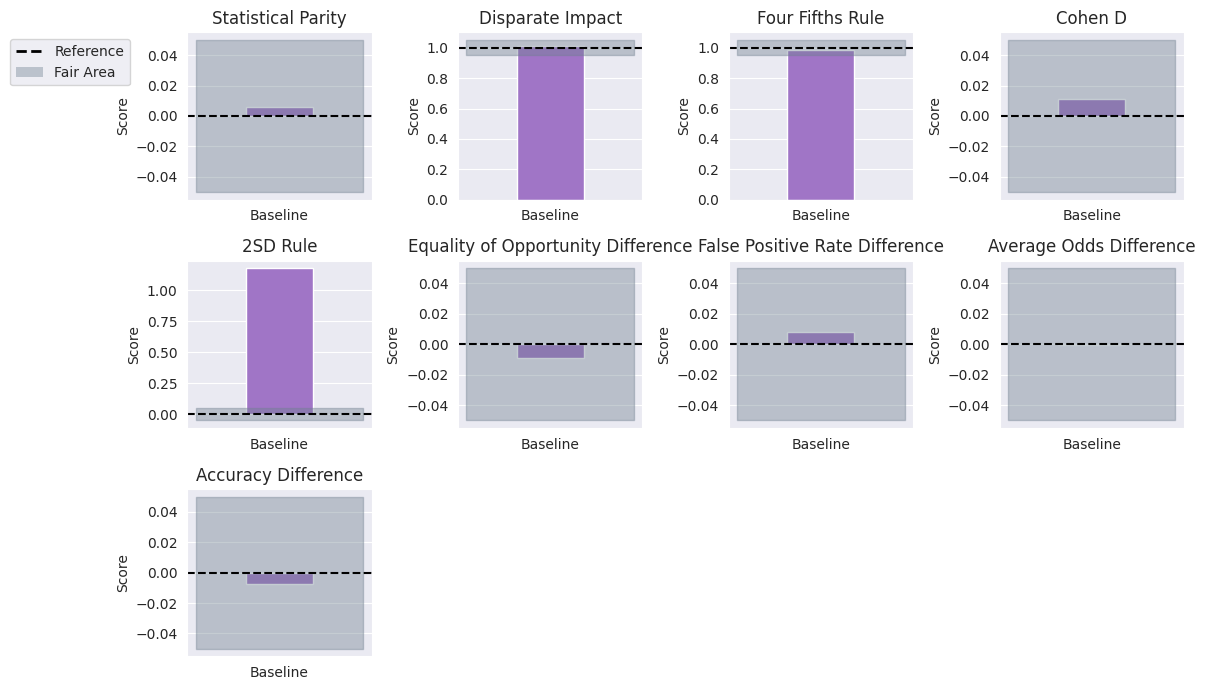

In [3]:
bias_metrics_report('binary_classification', metrics)

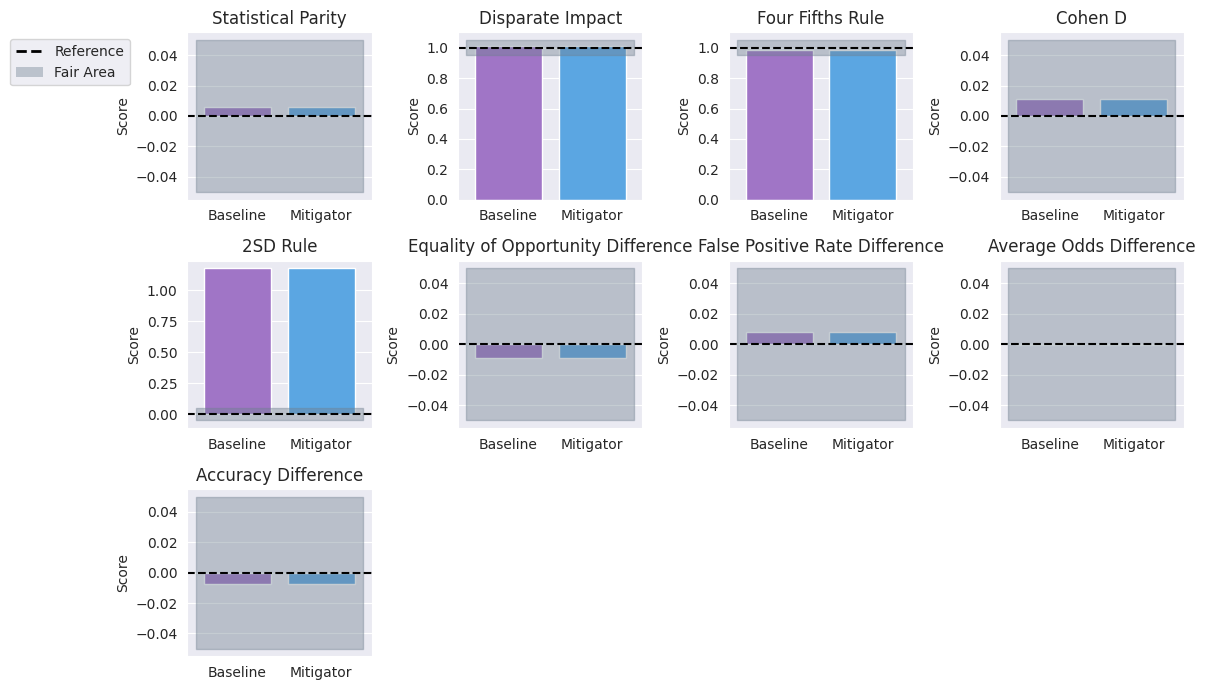

In [4]:
bias_metrics_report('binary_classification', metrics, mitigated)

#### Clustering Report

In [5]:
from holisticai.bias.metrics import clustering_bias_metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Dataframe
dataset = load_adult()
df_cluster = pd.concat([dataset["data"], dataset["target"]], axis=1)
protected_variables = ["sex", "race"]
output_variable = ["class"]

# Simple preprocessing
y = df_cluster[output_variable].replace({">50K": 1, "<=50K": 0})
X = pd.get_dummies(df_cluster.drop(output_variable+protected_variables, axis=1))
group = ["sex"]
group_a = df_cluster[group] == "Female"
group_b = df_cluster[group] == "Male"
data = [X, y, group_a, group_b]

# Train test split
dataset = train_test_split(*data, test_size=0.2, shuffle=True)
train_data = dataset[::2]
test_data = dataset[1::2]

X_train, _, group_a_train, group_b_train = train_data

# we choose to use 4 clusters
model = KMeans(n_clusters = 4)
model.fit(X_train)

# predict
p_attr_sex = df_cluster.iloc[X.index]['sex']
y_pred = model.predict(X)

group_a = p_attr_sex == 'Female'
group_b = p_attr_sex == 'Male'

centroids = model.cluster_centers_
data = np.array(X).astype(float)

metrics = clustering_bias_metrics(group_a, group_b, y_pred, data=data,centroids=centroids, metric_type = 'both')
mitigated = clustering_bias_metrics(group_a, group_b, y_pred, data=data,centroids=centroids, metric_type = 'both')

/home/kcosta/anaconda3/envs/holisticai/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/kcosta/anaconda3/envs/holisticai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


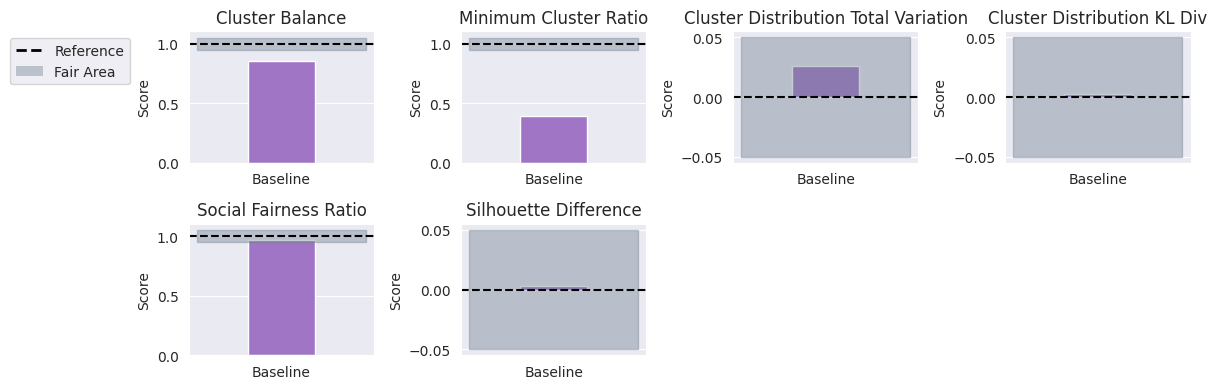

In [6]:
bias_metrics_report('clustering', metrics)

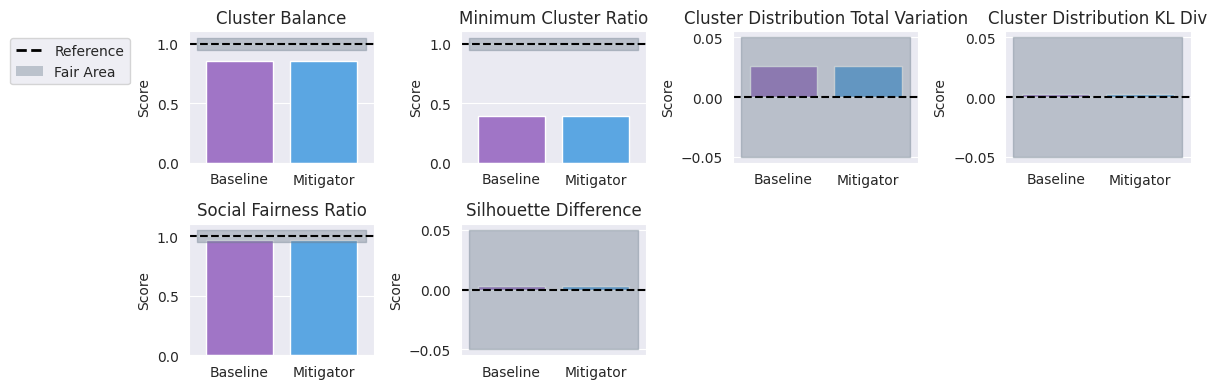

In [7]:
bias_metrics_report('clustering', metrics, mitigated)